In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from faker import Faker
import time
import datetime
import random

In [2]:
df_prices = pd.read_csv('data/historical_stock_prices.csv')
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_companies = pd.read_csv('data/historical_stocks.csv')
list_of_companies = df_companies['ticker']

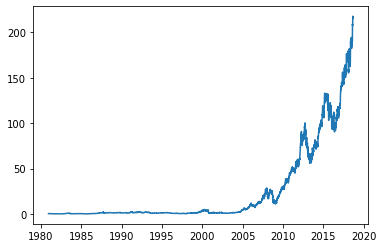

In [3]:
company_to_analyse = 'AAPL' # ticker
df_company = df_prices[df_prices['ticker'] == company_to_analyse]
plt.plot(df_company ['date'], df_company['close'])
# max_date = df_company['date'].max()
# min_date = df_company['date'].min()
# fake = Faker()
# investment_date = fake.date_between(start_date=min_date, end_date=max_date)

## Simulate Random Stock Market Investments

### Scenario 1:
- Investing from year X to year Y ('N' years) since a pre-defined 'Start_Investment_Year', 
- We invest a T amount of money in total, 
- either daily, monthly, or yearly
- the amounts of each investement are randomly distributed

In [4]:
# INPUTS
start_investment_year = 2012
end_investment_year = 2015
selling_day = '2018-02-02'
total_money_to_invest = 100000
investment_type = 'monthly'

In [5]:
start_investment_date = datetime.datetime.strptime('01/01/'+str(start_investment_year), "%d/%m/%Y")
end_investment_date = datetime.datetime.strptime('31/12/'+str(end_investment_year), "%d/%m/%Y")

In [6]:
if investment_type == 'monthly':
    pi = 12
elif investment_type == 'daily':
    pi = 365
elif investment_type == 'yearly':
    pi = 1
else:
    print("Warning: only options for monthly, daily and yearly investments have been configured")

number_of_individual_investments = (end_investment_year - start_investment_year)*pi
print(number_of_individual_investments)

36


How much will the monkey invest each time?

In [7]:
investment_quantities_list = np.random.dirichlet(np.ones(number_of_individual_investments))*total_money_to_invest
# 
investment_quantities_list

array([ 1866.74362206,  1530.12530381,  3939.99698717,  2301.75013007,
         931.71738863,  5078.65975801,  3792.57177353,   534.91384611,
        5122.87300589,  4932.73009068,  5302.00263264,   827.97800396,
        5031.13102266,  1302.91665528,    63.55202806,   745.5267919 ,
          67.59761814,  3881.51288307,  3274.12229889,    31.94421265,
        8650.68057269,  1351.48844886,    33.90446013,  3384.92374026,
        2049.93753239,   600.55547286,  4513.79718975,   501.76456102,
        1194.56939756,  4349.11743515,  2304.45747132,   129.02241117,
       10331.48558254,  2860.86162355,  2780.5681286 ,  4402.49991892])

When is the monkey going to invest this money?

In [8]:
investment_dates_list = []
fake = Faker()
for i in range(number_of_individual_investments):
    investment_date_temp = fake.date_between(start_date=start_investment_date, end_date=end_investment_date)
    investment_dates_list.append(investment_date_temp)
# 
investment_dates_list

[datetime.date(2015, 5, 13),
 datetime.date(2013, 1, 20),
 datetime.date(2013, 9, 23),
 datetime.date(2013, 9, 5),
 datetime.date(2013, 6, 1),
 datetime.date(2012, 7, 3),
 datetime.date(2015, 6, 2),
 datetime.date(2013, 10, 29),
 datetime.date(2015, 10, 2),
 datetime.date(2014, 9, 16),
 datetime.date(2014, 5, 3),
 datetime.date(2014, 2, 16),
 datetime.date(2014, 4, 5),
 datetime.date(2014, 11, 24),
 datetime.date(2014, 9, 15),
 datetime.date(2013, 9, 29),
 datetime.date(2015, 9, 11),
 datetime.date(2015, 3, 25),
 datetime.date(2012, 9, 17),
 datetime.date(2013, 11, 11),
 datetime.date(2013, 3, 27),
 datetime.date(2013, 1, 12),
 datetime.date(2014, 3, 14),
 datetime.date(2014, 1, 27),
 datetime.date(2012, 4, 13),
 datetime.date(2014, 3, 20),
 datetime.date(2013, 1, 18),
 datetime.date(2013, 4, 3),
 datetime.date(2014, 10, 23),
 datetime.date(2013, 7, 12),
 datetime.date(2013, 6, 6),
 datetime.date(2012, 4, 22),
 datetime.date(2013, 8, 10),
 datetime.date(2015, 1, 11),
 datetime.date(201

Which stocks is the monkey going to pick up?

Let's begin with removing stocks that didn't exists at the starting date or that were discontinued before the ending date

In [9]:
df_prices_temp = df_prices[(df_prices['date']>=start_investment_date) & (df_prices['date']<=end_investment_date)]

Some dates may not be avaible for trading - as holidays and weekends.
Pending on sorting this out.

In [10]:
number_of_business_days_period = np.busday_count(start_investment_date.date(),end_investment_date.date())
print(number_of_business_days_period)
number_of_data_points = df_prices_temp['ticker'].value_counts().max()
print(number_of_data_points)

1043
1006


Difference above it is probably attributed to holidays where Nasdaq closes: nine US stock market holidays - 5*9=36 days.

In [11]:
list_of_companies = df_prices_temp['ticker'].unique().tolist()

In [12]:
investment_companies_list = []
for i in range(number_of_individual_investments):
    company = random.choice(list_of_companies)
    investment_companies_list.append(company)
investment_companies_list

['SSP',
 'AFSS',
 'EGY',
 'PGR',
 'INF',
 'IDXX',
 'WDC',
 'GNRC',
 'PRTY',
 'CBMG',
 'ROAD',
 'JRJC',
 'BNDX',
 'DJCO',
 'APAM',
 'PPSI',
 'ESEA',
 'GPM',
 'XRX',
 'RDHL',
 'BANF',
 'LONE',
 'SWJ',
 'PAR',
 'BCE',
 'GRAM',
 'RENX',
 'MTGE',
 'CREE',
 'OVAS',
 'TAC',
 'WAT',
 'MTH',
 'DHI',
 'MC',
 'OCSLL']

Create summary of the investment stragedy in a dataframe

In [13]:
df_investment_stragedy = pd.DataFrame(list(zip(investment_companies_list, investment_dates_list, investment_quantities_list)),
               columns =['Company', 'Investment_Date', 'Investment_Value'])

In [14]:
df_investment_stragedy = df_investment_stragedy.sort_values(by='Investment_Date')
df_investment_stragedy.reset_index(inplace=True, drop=True) 
df_investment_stragedy['Investment_Date'] = pd.to_datetime(df_investment_stragedy['Investment_Date'])
df_investment_stragedy

,Company,Investment_Date,Investment_Value
0,BCE,2012-04-13,2049.937532
1,OCSLL,2012-04-18,4402.499919
2,WAT,2012-04-22,129.022411
3,IDXX,2012-07-03,5078.659758
4,XRX,2012-09-17,3274.122299
5,LONE,2013-01-12,1351.488449
6,RENX,2013-01-18,4513.797190
7,AFSS,2013-01-20,1530.125304
8,BANF,2013-03-27,8650.680573
9,MTGE,2013-04-03,501.764561


In [15]:
for i in range(len(df_investment_stragedy)):
    print(i)
    df_temp = df_investment_stragedy.iloc[i]
    # 
    try:
        value_at_purchase_date = df_prices[(df_prices['ticker'] == df_temp['Company']) &
                                        (df_prices['date'] == df_temp['Investment_Date'])]
        value_at_selling_date = df_prices[(df_prices['ticker'] == df_temp['Company']) &
                                        (df_prices['date'] == selling_day)]
        # 
        number_of_stocks = df_temp['Investment_Value']/value_at_purchase_date
        # 
        stock_buying_value = value_at_purchase_date['open'].iloc[0]
        stock_selling_value = value_at_selling_date['close'].iloc[0]
        percentage_change = (stock_selling_value - stock_buying_value) / stock_buying_value
        # 
        selling_value = number_of_stocks*stock_selling_value
        profit = selling_value - df_temp['Investment_Value']
        # 
        df_investment_stragedy.at[i,'selling_value'] = selling_value
        df_investment_stragedy.at[i,'number_of_stocks'] = number_of_stocks
        df_investment_stragedy.at[i,'stock_buying_value'] = stock_buying_value
        df_investment_stragedy.at[i,'stock_selling_value'] = stock_selling_value
        df_investment_stragedy.at[i,'percentage_change'] = percentage_change
        df_investment_stragedy.at[i,'net_profit'] = profit
    except:
        df_investment_stragedy.at[i,'percentage_change'] = ''
        df_investment_stragedy.at[i,'selling_value'] = ''
        df_investment_stragedy.at[i,'profit'] = ''


0
1
2
3


In [ ]:
df_investment_stragedy

,Company,Investment_Date,Investment_Value,percentage_change,selling_value,profit
0,VET,2012-01-20,38.639342,,,
1,HAS,2012-03-18,2719.888516,,,
2,XELA,2012-03-28,2550.527798,,,
3,ABT,2012-04-14,94.354080,,,
4,RTIX,2012-05-06,1073.116914,,,
5,VGM,2012-05-17,3774.238735,,,
6,MQT,2012-05-19,4970.327004,,,
7,BLMN,2012-08-04,2655.671687,,,
8,NBD,2012-08-23,1009.553889,,,
9,PRT,2012-12-13,60.437704,,,
